# Table of Contents
* &nbsp;
	* [Lab -- Basic Filtering](#Lab----Basic-Filtering)
		* [Analysis of the data](#Analysis-of-the-data)
		* [Filtering](#Filtering)
		* [Design and implementation of the lowpass averaging filter](#Design-and-implementation-of-the-lowpass-averaging-filter)
			* [Theoretical part:](#Theoretical-part:)
			* [Practical part](#Practical-part)
			* [Computation of the subtracting filter](#Computation-of-the-subtracting-filter)
		* [Second part: Boost of a frequency band](#Second-part:-Boost-of-a-frequency-band)
			* [Pratical part](#Pratical-part)
		* [Lowpass [0- 250 Hz] filtering  by the window method](#Lowpass-[0--250-Hz]-filtering--by-the-window-method)
			* [Theoretical Part](#Theoretical-Part)
			* [Practical part](#Practical-part)
			* [Output of the lowpass filter](#Output-of-the-lowpass-filter)
			* [Group Delay](#Group-Delay)


In [1]:
%run nbinit.ipy

... Configuring matplotlib formats
... Configuring matplotlib with inline figures
... Importing numpy as np, scipy as sp, pyplot as plt, scipy.stats as stats
   ... scipy.signal as sig
... Importing widgets, display, HTML, Image, Javascript
... Some LaTeX definitions


... Defining figures captions 


... Loading customized Javascript for interactive solutions (show/hide)


## Lab -- Basic Filtering


Author: [J.-F. Bercher](http://www.esiee.fr/~bercherj) <br>
date: november 19, 2013 <br>
Update: february 25, 2014<br>
Last update: december 08, 2014

>The goal of this lab is to study and apply several digital filters to a periodic signal with fundamental frequency $f_{0}$=200 Hz, sampled at frequency $F_{s}$=8000 Hz. This signal is corrupted by a low drift, and that is a common problem with sensor measurements. A first filter will be designed in order to remove this drift. In a second step, we will boost a frequency range withing the components of this signal. Finally, we will consider the design of a simple low-pass filter using the window method, which leads to a linear-phase filter. 
>
>This signal is contained into the vector $x$ stored in the file
[sig1.npz](sig1.npz). It is possible to load it via the instruction 
`f=np.load('sig1.npz')`



In [2]:
Fs=8000
Ts=1/Fs

First load all useful modules:

In [3]:
import numpy as np
from numpy import ones, zeros, abs, exp, pi, sin, real, imag
import matplotlib.pyplot as plt
import scipy.io
from scipy.signal import lfilter
from numpy.fft import fft, ifft, fftshift

%matplotlib inline

### Analysis of the data

In [4]:
# utilitary function
def freq(N,Fs=1):
    """ Returns a vector of size N  of normalized frequencies
    between -Fs/2 and Fs/2 """
    return np.linspace(-0.5,0.5,N)*Fs

In [5]:
# To load the signal
sig1=np.load('sig1.npz')
#sig1 is a dictionnary. One can look at the keys by: sig1.keys()
m=sig1['m']
x=sig1['x']

FileNotFoundError: [Errno 2] No such file or directory: 'sig1.npz'

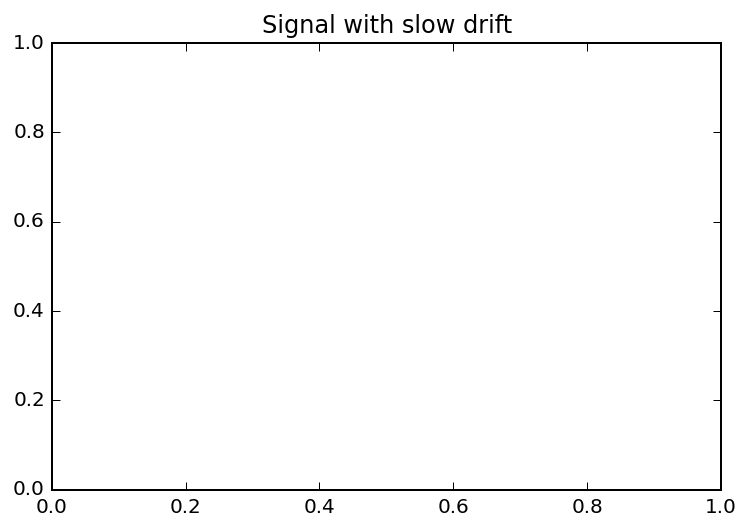

In [6]:
# Time
plt.figure(1)
#...
plt.title('Signal with slow drift')


In [7]:

# Frequency representation
plt.figure(2)
N=len(x)
f=freq(N)
#plt.plot(f,...)
#plt.title('Fourier transform of the signal (modulus)')


NameError: name 'x' is not defined

AttributeError: 'NoneType' object has no attribute 'index'

### Filtering

>We wish now to modify the spectral content of $x$ using different digital filters with transfer function 
$H(z)=B(z)/A(z)$. A standard Python function will be particularly useful: 
>
>- *lfilter* implements the associated difference equation. This function computes the output vector $y$ of the digital filter specified by 
  * the vector $B$ (containing the coefficients of the numerator  $B(z)$, 
  * and by the vector $A$ of the denominator's coefficients  $A(z)$, 
for an input vector $x$:
`y=lfilter(B,A,x)`
>
>- *freqz* computes the frequency response 
$H$(e$^{j2\pi f / Fs})$ in modulus and phase, for a filter described by the two vectors $B$ and $A$: 
`freqz(B,A)`

### Design and implementation of the lowpass averaging filter

>The signal is corrupted by a slow drift of its mean value. We look for a way to extract and then  remove this drift. We will denote $M(n)$ the drift, and $x_c(n)$ the centered (corrected) signal.

#### Theoretical part:

>What analytical expression enable to compute the signal's mean <u>on a period</u>?
>
>From that, deduce a filter with impulse response $g(n)$ which computes this mean $M(n)$.
>
>Find another filter, with impulse response $h(n)$, removes this mean: $x_{c}(n)= x(n) - M(n) = x(n) *  h(n)$. Give the expression of $h(n)$.
>
>Also give the analytical expressions of  $G(z)$ and $H(z)$. 

#### Practical part

>For the averaging filter and then for the subtracting filter:

>- Compute and plt.plot the two impulse responses (you may use the instruction `ones(L)` which returns a vector of  $L$ ones.

>- plt.plot the frequency responses of these two filters. You may use  the function `fft` which returns the Fourier transform, and plt.plot the modulus `abs` of the result.

>- Filter  $x$ by these two filters. plt.plot the output signals, in the time and frequency domain. Conclude. 

In [8]:
# Averaging filter
#-----------------------------------------------------------
# Filter g which computes the mean on a period of 40 samples
#...
# ...
#plt.plot(t,x,t,m_estimated)
#plt.title('Signal and estimated drift')
#
# We check G(f)
#G=...
#plt.xlabel('Normalized fequencies')
#plt.title('Transfer Function of the Averaging Filter')

#### Computation of the subtracting filter

In [9]:
# Mean subtracting filter
#-----------------------------------------------------------
# The filter h subtract the mean computed over a sliding window of 40 samples
# h may be defined as 
#...
#plt.title('Signal with removed drift')
#plt.show()

#
#plt.xlabel('Frequencies')
#plt.xlim([-0.5, 0.5])
#plt.title('Fourier transform of the signal with removed drift')


#We check H(f)
#...
#plt.xlabel('Normalized fequencies')
#plt.title('Transfer Function of the Subtracting Filter')

### Second part: Boost of a frequency band

>We wish now to boost a range of freqencies aound 1000 Hz on the initial signal. 
>
>## Theoretical Part
>
>After a (possible) recall of the lecturer on rational filters, compute the poles $p_{1}$ and $p_{2}$ of a filter in order to perform this accentuation. Compute the transfer function $H(z)$ and the associated impulse response  $h(n)$. 

#### Pratical part

>- The vector of denominator's $A(z)$ coefficients will be computed according to `A=poly([p1,p2])`, and you will check that you recover the hand-calculated coefficients.
>
>- plt.plot the frequency response
>
>- Compute the impulse response, according to 
        # computing the IR
        d=zeros(300)
        d[1]=1
        h_accentued=lfilter([1],a,d)
(output to a Dirac impulse on 300 point). plot it. 
>
>- Compute and plot the impulse response obtained using the theoretical formula. Compare it to the simulation. 
>
>-  Compute and plot the output of the filter with input $x_{c}$, both in the time and frequency domain. Conclude. 

In [10]:
# ...

# Compute the IR
# ...
#plt.plot(h_accentued)
#plt.title('Impulse response of the boost filter')

# in frequency
# ...
#plt.xlabel('Normalized frequencies')
#plt.xlim([-0.5, 0.5])
#plt.title('Transfer Function of the Boost Filter')

In [11]:
# Filtering
#sig_accentuated=...
# ...
#plt.xlabel('Time')
#plt.xlim([0, len(x)*Ts])
#plt.title('Signal with boosted 1000 Hz')

# In the frequency domain
# ...
#plt.xlabel('Normalized frequencies')
#plt.xlim([-Fs/2, Fs/2])
#plt.title('Fourier Transform of Boosted Signal')

- How can we simultaneously boost around 1000 Hz and remove the drift?
Propose a filter that performs the two operations.


In [12]:
# both filterings: 
# ...

#plt.xlabel('Time')
#plt.xlim([0, len(x)*Ts])
#plt.title('Centered Signal with Boosted 1000 Hz')

### Lowpass [0- 250 Hz] filtering  by the window method

>We want now to only keep the low-frequencies components  (0 
à 250 Hz) of $x_{c}$ by filtering with a lowpass 
FIR filter with $N$=101 coefficients. 
>
>##Theoretical Part
>
>We consider the ideal lowpass filter whose transfer function $H(f)$ (in modulus) is a rectangular function. Compute the (infinite support) impulse response of the associated digital filter.
>
>##Practical Part 
>
>a. We want to limit the number of coefficients to $L$ (FIR). We thus have to clip-off the initial impulse response. Compute the vector $h$ with $L$ coefficients corresponding to the initial response, windowed by a rectangular window rect$_{T}(t)$, where 
$T=L*Ts$.
>
>b. plt.plot the frequency response.
>
>c. Comput and plt.plot the output of this filter subject to the input 
$x_{c}$.
>
>d. Observe the group delay of the frequency response: `plt.plot(f,grpdelay(B,A,N))`. Comment.

#### Theoretical Part

#### Practical part

In [13]:
B=250
Fs=8000
B=B/Fs # Band in normalized fequencies
n=np.arange(-150,150)

def sinc(x):
    x=np.array(x)
    z=[sin(n)/n if n!=0 else 1 for n in x]
    return np.array(z)

# ...
#plt.xlabel('n')
#plt.title('Impulse response')

In [14]:
# ...

#plt.title("Frequency Response")
#plt.xlim([-1000, 1000])
#plt.grid(True)

#### Output of the lowpass filter

#### Group Delay

>The group delay is computed as indicated  [here](https://ccrma.stanford.edu/~jos/fp/Numerical_Computation_Group_Delay.html), cf https://ccrma.stanford.edu/~jos/fp/Numerical_Computation_Group_Delay.html

In [15]:
def grpdelay(h):
    N=len(h)
    NN=1000
    hn=h*np.arange(N)
    num=fft(hn.flatten(),NN)
    den=fft(h.flatten(),NN) 
    Mden=max(abs(den))
    #den[abs(den)<Mden/100]=1
    Td=real(num/den)
    Td[abs(den)<Mden/10]=0
    return num,den,Td
hh=zeros(200)
#hh[20:25]=array([1, -2, 70, -2, 1])
hh[24]=1
#plt.plot(grpdelay(hh))
num,den,Td=grpdelay(h_tronq)
plt.figure(3)
plt.plot(Td)

NameError: name 'h_tronq' is not defined

Thus we see that we have a group delay of ...

END.